In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'D:\ML_Codes\100-days-of-machine-learning-main\day33-handling-mixed-variables\titanic.csv')

In [4]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [7]:
# number columns as mixed variables which we are supposed to solve here.
# basically, number col. tell us how many num of members are there in titanic
# but "A" denotes "alone" which is not a number.So , change this "A" to number.


df['number'].isnull().sum()

0

In [8]:
df.number.unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [16]:
total_num_of_passenger_travel_in_each_category = df.number.value_counts()

<AxesSubplot:>

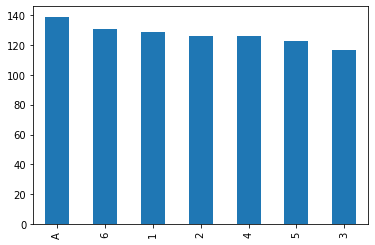

In [32]:
total_num_of_passenger_travel_in_each_category.plot.bar()

In [34]:
total_num_of_passenger_travel_in_each_category

A    139
6    131
1    129
2    126
4    126
5    123
3    117
Name: number, dtype: int64

In [37]:
# now we ARE supposed to make new col for numerical and categorical values
df['num_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [48]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [39]:
import numpy as np

In [41]:
# now extracting the categorical part into new col.

df['num_categorical'] = np.where(df['num_numerical'].isnull(),df['number'],np.nan)

In [42]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [50]:
# now we have another col i.e cabin having mixed variable data
# let's solve this!!
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [51]:
# using regex
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')

In [53]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123
4,NaN,373450,A,0,NaN,A,NaN


In [54]:
df['cabin_categorical'] = df['Cabin'].str[0]  # it will capture only first letter of the data col.


In [55]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num,cabin_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

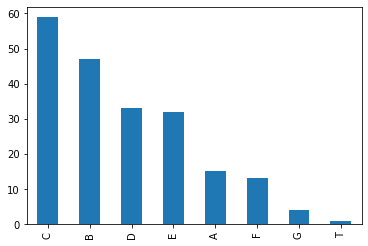

In [64]:
df['cabin_categorical'].value_counts().plot(kind='bar')

In [65]:
#lets work on ticket col
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [72]:
#extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])

In [73]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num,cabin_categorical,ticket_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282
3,C123,113803,3,1,3.0,NaN,123,C,113803
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450


In [76]:
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [77]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num,cabin_categorical,ticket_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0
3,C123,113803,3,1,3.0,NaN,123,C,113803.0
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0


In [78]:
df['ticket_num'].dtype

dtype('float64')

In [80]:
# extract categorical part fron the ticket col
df['ticket_categorical'] = df['Ticket'].apply(lambda s: s.split()[0])

In [81]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num,cabin_categorical,ticket_num,ticket_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,113803
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,373450


In [82]:
df['ticket_categorical'] = np.where(df['ticket_categorical'].str.isdigit(),np.nan,df['ticket_categorical'])

In [83]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_categorical,cabin_num,cabin_categorical,ticket_num,ticket_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
